# Comparisons, Masks, and Boolean Logic

In [1]:
# use pandas to extract rainfall inches as a NumPy Array.
# Plotting a histogram of the data doesn't give a real idea of how much rain there is in a year
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd

rainfall = pd.read_csv('/Users/anthonyesposito/Desktop/python_practice/Python_Practice/Basic_Coding/Numpy_Practice/PythonDataScienceHandbook-master/notebooks/data/Seattle2014.csv')['PRCP']
inches = rainfall / 254.0 # conversion for 1/10mm to incehs
inches.shape

(365,)

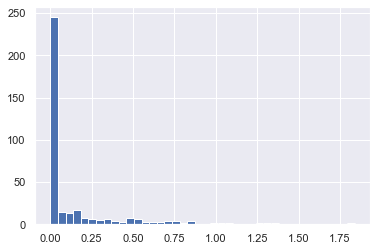

In [2]:
plt.hist(inches, 40);

### Examples of the Comparison operators as Ufuncs

In [3]:
x = np.array([1, 2, 3, 4, 5])

In [4]:
x < 3

array([ True,  True, False, False, False])

In [5]:
x > 3

array([False, False, False,  True,  True])

In [6]:
x <= 3

array([ True,  True,  True, False, False])

In [7]:
x >= 3

array([False, False,  True,  True,  True])

In [8]:
x != 3

array([ True,  True, False,  True,  True])

In [9]:
x == 3

array([False, False,  True, False, False])

In [10]:
(2 * x) == (x**2)

array([False,  True, False, False, False])

In [11]:
# The comparison operators can be applied to an array of any size.

rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [12]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [13]:
print(x * (x==6), '\n')
print(x * (x < 4), '\n')
print(x * (x >= 4), '\n')

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 6]] 

[[0 0 3 3]
 [0 0 3 0]
 [2 0 0 0]] 

[[5 0 0 0]
 [7 9 0 5]
 [0 4 7 6]] 



In [14]:
print(np.count_nonzero(x==6), '\n')
print(np.count_nonzero(x < 4), '\n')
print(np.count_nonzero(x >= 4), '\n')

1 

5 

7 



In [15]:
np.sum(x < 6)

8

In [16]:
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [17]:
np.sum(x < 6, axis=0)

array([2, 2, 2, 2])

In [18]:
np.any(x <3)

True

In [19]:
(x * (x < 3))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [2, 0, 0, 0]])

In [20]:
np.sum(x <3)

2

In [21]:
print(inches.head(5), '\n')
print(np.sum((inches > .5) & (inches<1)))

0    0.000000
1    0.161417
2    0.059055
3    0.000000
4    0.000000
Name: PRCP, dtype: float64 

29


In [22]:
print(np.sum(~( (inches <= .5) | (inches >= 1))))

29


In [23]:
"""
Operator 	Equivalent ufunc
& 	np.bitwise_and
| 	np.bitwise_or
^ 	np.bitwise_xor
~ 	np.bitwise_not
""";

In [24]:
print("Number days without rain:     ", np.sum(inches == 0))
print("Number days with rain:        ", np.sum(inches != 0))
print("Days wiht mor tahn .5 inches: " , np.sum(inches > .5))
print("Rainy days with < .2 inches:  ", np.sum((inches > 0)&(inches < .2)))

Number days without rain:      215
Number days with rain:         150
Days wiht mor tahn .5 inches:  37
Rainy days with < .2 inches:   75


In [25]:
#Create a mask of rainy days
rainy = (inches > 0)

# construct a mask of all summer days(June 21st is the 172nd day)

days = np.arange(365)
summer = (days > 172) & (days < 262)


print("Median precip on rainy days in 2014 (inches)                :", np.median(inches[rainy]))
print("Median precip on rain days in summer 2014 (inches)          :", np.median(inches[summer & rainy]))
print("Maximum precip on rainy days in  summer 2014 (inches)       :", np.max(inches[summer]))
print("Maximum precip on rainy days outside of summer 2014 (inches):", np.max(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches)                : 0.19488188976377951
Median precip on rain days in summer 2014 (inches)          : 0.0610236220472441
Maximum precip on rainy days in  summer 2014 (inches)       : 0.8503937007874016
Maximum precip on rainy days outside of summer 2014 (inches): 1.8385826771653544


In [26]:
np.sum(summer)

89

In [27]:
np.sum(summer & rainy)

14

In [28]:
 """
The Boolean operators 'and' and 'or' operate on the entire object

    '&' and '|' operate bitwise on an array

Also

""";

In [29]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
print (A | B, '\n')

[ True  True  True False  True  True] 

